In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd

import string
import nltk

In [2]:
# Benötigte Ressourcen herunterladen
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/julian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/julian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/julian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/julian/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Tokenisierung von "Was war weniger gut?"

In [3]:
file_path = 'mittel.txt'

In [4]:
# Funktion, um Text zu verarbeiten
def process_text(file_path, language='german'):
    # Datei einlesen
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # 1. Sätze tokenisieren
    sentences = sent_tokenize(text, language=language)

    # 2. Wörter tokenisieren, Stopwords und Satzzeichen entfernen
    stop_words = set(stopwords.words(language))
    lemmatizer = WordNetLemmatizer()

    # Iteration über alle Sätze im File
    processed_sentences = []
    for sentence in sentences:
        # Wörter tokenisieren
        words = word_tokenize(sentence, language=language)

        # Stopwords und Satzzeichen entfernen, lemmatisieren
        filtered_words = [lemmatizer.lemmatize(word.lower()) for word in words
                          if word.lower() not in stop_words and word not in string.punctuation]

        # Satz wieder zusammensetzen
        processed_sentences.append(" ".join(filtered_words))

    return processed_sentences

In [5]:
# Aufruf der Funktion
result = process_text(file_path, language='german')

# Ergebnis ausgeben
for i, sentence in enumerate(result, 1):
    print(f"Satz {i}: {sentence}")

Satz 1: kommunikation untereinander neuesten stand
Satz 2: kommunikation lief schon besser vergangenen projekten verbesserungswürdig
Satz 3: vereinigung einzelsysteme erfordert mehr kommunikationsaufwand
Satz 4: aufsetzen umgebung gemeinsames arbeiten
Satz 5: priorisierung einzelner aufgaben anforderungen entsprechend
Satz 6: kommunikation okay perfekt
Satz 7: kommunikation weniger gut gab missverständnisse mussten teilaufgaben neu begonnen
Satz 8: aufgabenbeschreibung manchmal ganz hilfreich
Satz 9: aufgabenvorgaben wenig information
Satz 10: aufgabenverteilung
Satz 11: programmieren viele nerven gekostet öfters kleinere probleme gab leicht kommt
Satz 12: kommunikation aufgabe priorisiert
Satz 13: backlog unklar
Satz 14: befüllen backlog
Satz 15: planung
Satz 16: regelmäßige update jira/repo schauen
Satz 17: pflegen jiras
Satz 18: zeitplanung/ zeitdruck
Satz 19: klare konkrete zielsetzung


## KMeans mit SKlearn

In [6]:
# Hauptlogik für KMeans-Clustering
def perform_kmeans(file_path, num_clusters=3, language='german'):
    # Text verarbeiten
    processed_sentences = process_text(file_path, language)

    # Anwendung von TfidfVectorizer
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(processed_sentences)

    # KMeans anwenden
    kmeans = KMeans(n_clusters=num_clusters, random_state=42) # random_state für rekonstruierbare Ergebnisse
    kmeans.fit(X)

    # Cluster-Zuweisungen
    clusters = kmeans.labels_

    '''
    # Ausgabe
    for i, sentence in enumerate(processed_sentences):
        print(f"Sentence: {sentence}")
        print(f"Cluster: {clusters[i]}")
        print("")
    '''

    return clusters, processed_sentences

In [7]:
clusters, sentences = perform_kmeans(file_path, num_clusters=4, language='german')

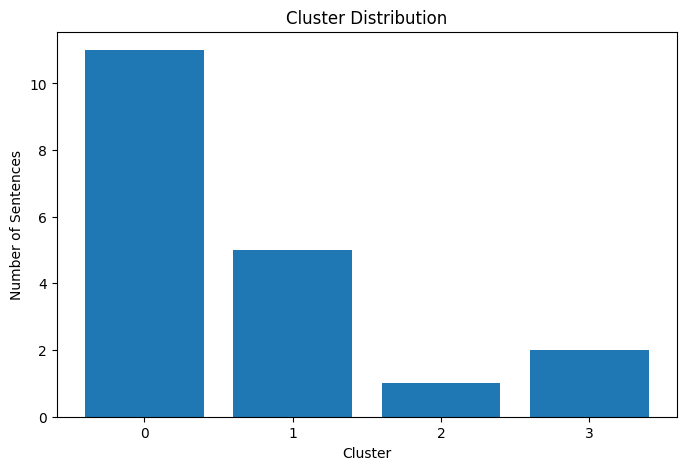

In [8]:
# Ergebnisse in ein DataFrame bringen
data = pd.DataFrame({
    'Sentence': sentences,
    'Cluster': clusters
})

# Verteilung der Cluster
cluster_counts = Counter(clusters)

# Barplot für die Cluster-Verteilung
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.keys(), cluster_counts.values())
plt.xlabel('Cluster')
plt.ylabel('Number of Sentences')
plt.title('Cluster Distribution')
plt.xticks(range(len(cluster_counts)))
plt.show()

In [9]:
# Darstellung der Sätze pro Cluster
for cluster in sorted(cluster_counts.keys()):
    print(f"\nCluster {cluster} ({cluster_counts[cluster]} Einträge):")
    cluster_sentences = data[data['Cluster'] == cluster]['Sentence']
    for sentence in cluster_sentences:
        print(f"- {sentence}")


Cluster 0 (11 Einträge):
- aufsetzen umgebung gemeinsames arbeiten
- priorisierung einzelner aufgaben anforderungen entsprechend
- aufgabenbeschreibung manchmal ganz hilfreich
- aufgabenvorgaben wenig information
- aufgabenverteilung
- programmieren viele nerven gekostet öfters kleinere probleme gab leicht kommt
- planung
- regelmäßige update jira/repo schauen
- pflegen jiras
- zeitplanung/ zeitdruck
- klare konkrete zielsetzung

Cluster 1 (5 Einträge):
- kommunikation untereinander neuesten stand
- kommunikation lief schon besser vergangenen projekten verbesserungswürdig
- kommunikation okay perfekt
- kommunikation weniger gut gab missverständnisse mussten teilaufgaben neu begonnen
- kommunikation aufgabe priorisiert

Cluster 2 (1 Einträge):
- vereinigung einzelsysteme erfordert mehr kommunikationsaufwand

Cluster 3 (2 Einträge):
- backlog unklar
- befüllen backlog
